<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6548453

### Student Name: Yushan Tian
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [6]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [7]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL

import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.metrics import balanced_accuracy_score, mean_squared_error

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [8]:
# YOUR CODE HERE

df_bikes = pd.read_csv('bike-share.csv')

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

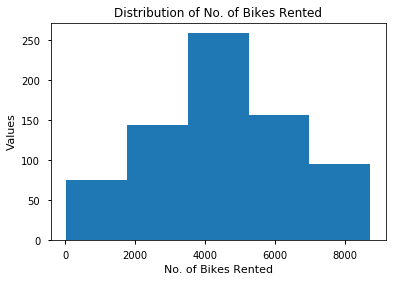

In [9]:
# YOUR CODE HERE

#Looking at the distribution of CNT in the dataset
plt.hist(df_bikes.cnt.dropna(),bins=5)
plt.xlabel('No. of Bikes Rented')
plt.ylabel('Values')
plt.title('Distribution of No. of Bikes Rented')
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
The graph above shows the distribution of the No. of Bikes Rented. The most frequent 

</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

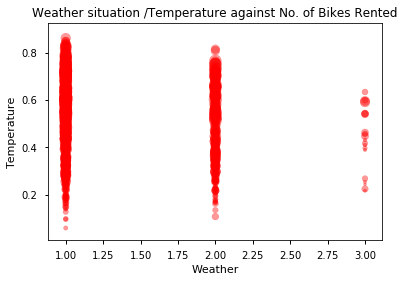

In [10]:
# YOUR CODE HERE
#df_1 = df_bikes.groupby(['weathersit','cnt'],as_index=False).count()
#df_1 = df_1.groupby(['weathersit'],as_index=False).count()
#print(df_1)

x=df_bikes.weathersit
y=df_bikes.temp
z=df_bikes.cnt
plt.scatter(x,y,s=z/50,c='red',alpha=0.4)
plt.xlabel('Weather')
plt.ylabel('Temperature')
plt.title('Weather situation /Temperature against No. of Bikes Rented')
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

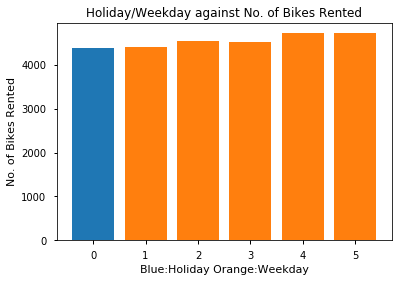

In [11]:
# YOUR CODE HERE
df_days = df_bikes.groupby(['holiday','weekday','cnt'],as_index=False).mean()
df_holiday = df_bikes.loc[((df_bikes['holiday']==1)|df_bikes['workingday']==0)] #filter out holiday
df_weekday = df_bikes.loc[(df_bikes['workingday']==1)]                          #filter out weekday
#df_weekday = df_workingday.loc[(df_bikes['weekday']==5)|(df_bikes['weekday']==1)|(df_bikes['weekday']==2)|(df_bikes['weekday']==3)|(df_bikes['weekday']==4)]
df_holiday_cnt = df_holiday.groupby(['holiday'],as_index=False).agg({'cnt':'mean'}) #cal mean of cnt on holiday
df_weekday_cnt = df_weekday.groupby(['weekday'],as_index=False).agg({'cnt':'mean'}) #cal mean of cnt on weekday
#print(df_weekday_cnt)

plt.bar(df_holiday_cnt.index,df_holiday_cnt['cnt'])
plt.bar(df_weekday_cnt['weekday'],df_weekday_cnt['cnt'])
plt.xlabel('Blue:Holiday Orange:Weekday')
plt.ylabel('No. of Bikes Rented')
plt.title('Holiday/Weekday against No. of Bikes Rented')
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

Text(0.5, 1.0, 'No. of Registered & Casual user against Holiday/Weekday')

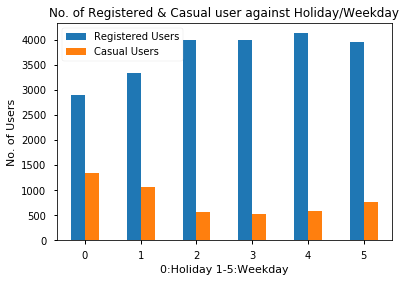

In [12]:
# YOUR CODE HERE
def combined_holiday_weekday(row): 
    if (row['holiday']==1): 
        return 1
    if (row['weekday']==6): 
        return 1
    else: 
        return row['weekday']  

df_bikes['Holiday_Weekday'] = df_bikes.apply(combined_holiday_weekday, axis=1) #Combine holiday and weekday
#print(df_bikes[['registered','casual','holiday','weekday','Holiday_Weekday']])

df_registered = df_bikes.groupby(['Holiday_Weekday'],as_index=False).agg({'registered':'mean'})#cal mean of registered users on weekday
df_casual = df_bikes.groupby(['Holiday_Weekday'],as_index=False).agg({'casual':'mean'}) #cal mean of casual users on weekday

#plt.bar(df_registered.index,df_registered['registered'])
#plt.bar(df_casual.index,df_casual['casual'])
#plt.show()

index=df_casual.index
df = pd.DataFrame({'Registered Users': df_registered.registered, 
                   'Casual Users': df_casual.casual}, index=index)
ax = df.plot.bar(rot=0)
ax.set_xlabel('0:Holiday 1-5:Weekday')
ax.set_ylabel('No. of Users')
ax.set_title('No. of Registered & Casual user against Holiday/Weekday')

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

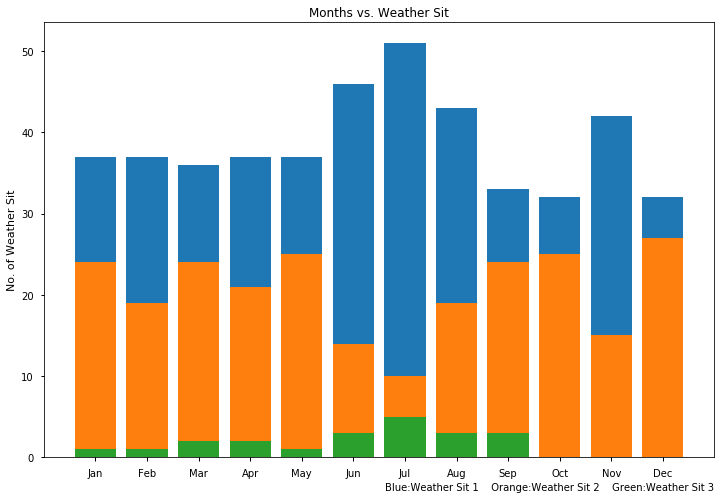

In [15]:
# YOUR CODE HERE
fig = plt.figure(figsize=(12,8))

df_ws1 = df_bikes.loc[(df_bikes['weathersit']==1)]
df_ws1 = df_ws1.groupby(['mnth'],as_index=False).agg({'weathersit':'count'})
#print(df_ws1)
df_ws2 = df_bikes.loc[(df_bikes['weathersit']==2)]
df_ws2 = df_ws2.groupby(['mnth'],as_index=False).agg({'weathersit':'count'})
#print(df_ws2)
df_ws3 = df_bikes.loc[(df_bikes['weathersit']==3)]
df_ws3 = df_ws3.groupby(['mnth'],as_index=False).agg({'weathersit':'count'})
#print(df_ws3)

#df_ws1.set_index("name",drop=True,inplace=True)
plt.bar(df_ws1.index,df_ws1['weathersit'])
plt.bar(df_ws2.index,df_ws2['weathersit'])
plt.bar(df_ws3.index,df_ws3['weathersit'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Blue:Weather Sit 1    Orange:Weather Sit 2    Green:Weather Sit 3',horizontalalignment='right', x=1.0,fontsize=10)
plt.ylabel('No. of Weather Sit')
plt.title("Months vs. Weather Sit")
plt.show()

# We’ve specified weather so that you can decide yourself what you think is important, and justify it. For example, some might consider wind speed to be important (because it might have an effect on atemp due to wind chill), and others might see humidity to be low enough that it shouldn’t make a difference. Explore the data and find potential relationships (or lack thereof) between attributes relating and including weather.
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

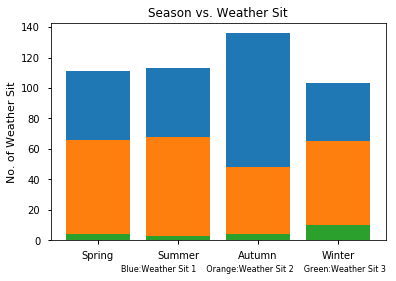

In [16]:
df_ws1 = df_bikes.loc[(df_bikes['weathersit']==1)]
df_ws1_season = df_ws1.groupby(['season'],as_index=False).agg({'weathersit':'count'})
#print(df_ws1)
df_ws2 = df_bikes.loc[(df_bikes['weathersit']==2)]
df_ws2_season = df_ws2.groupby(['season'],as_index=False).agg({'weathersit':'count'})
#print(df_ws2)
df_ws3 = df_bikes.loc[(df_bikes['weathersit']==3)]
df_ws3_season = df_ws3.groupby(['season'],as_index=False).agg({'weathersit':'count'})
#print(df_ws3)

#df_ws1.set_index("name",drop=True,inplace=True)
plt.bar(df_ws1_season.index,df_ws1_season['weathersit'])
plt.bar(df_ws2_season.index,df_ws2_season['weathersit'])
plt.bar(df_ws3_season.index,df_ws3_season['weathersit'])
plt.xticks([0,1,2,3],['Spring','Summer','Autumn','Winter'])
plt.xlabel('Blue:Weather Sit 1    Orange:Weather Sit 2    Green:Weather Sit 3',horizontalalignment='right', x=1.0,fontsize=8)
plt.ylabel('No. of Weather Sit')
plt.title("Season vs. Weather Sit")
plt.show()

<span style="color:blue">
    
### YOUR ANSWER HERE
As i illustrated the two bar charts above, we can easily found out that Different Months and different seasons have different weathers. Compared with Spring and Summer, Autumn has more clear and cloudy weather, less mist weather.However, Winter has the most often weather of light snow and rain.

</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

In [17]:
# YOUR CODE HERE
df_ws1 = df_bikes.loc[(df_bikes['weathersit']==1)]
df_ws1_season = df_ws1.groupby(['season'],as_index=False).agg({'weathersit':'count'})
#print(df_ws1)
df_ws2 = df_bikes.loc[(df_bikes['weathersit']==2)]
df_ws2_season = df_ws2.groupby(['season'],as_index=False).agg({'weathersit':'count'})
#print(df_ws2)
df_ws3 = df_bikes.loc[(df_bikes['weathersit']==3)]
df_ws3_season = df_ws3.groupby(['season'],as_index=False).agg({'weathersit':'count'})
#print(df_ws3)

#df_ws1.set_index("name",drop=True,inplace=True)
plt.bar(df_ws1_season.index,df_ws1_season['weathersit'])
plt.bar(df_ws2_season.index,df_ws2_season['weathersit'])
plt.bar(df_ws3_season.index,df_ws3_season['weathersit'])
plt.xticks([0,1,2,3],['Spring','Summer','Autumn','Winter'])
plt.xlabel('Blue:Weather Sit 1    Orange:Weather Sit 2    Green:Weather Sit 3',horizontalalignment='right', x=1.0,fontsize=8)
plt.ylabel('No. of Weather Sit')
plt.title("Season vs. Weather Sit")
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
In this part, i am going to discuss the relationship between No. of bike rented(cnt) and the enverinment(such as Season, Weather Sit, Tempetura, atemp, humnity, windspeed)

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [158]:
# YOUR CODE HERE

#The sklearn linear regression object uses R^2 scores, and if you look at the lecture scripts 
#from Lecture 10 there is a mention of the sklearn.metrics module, which has many statistical 
#tests you can choose from and implement if you wish. There is currently no benchmark for precision for the model.
def load_data(file_name):
    df_bike = pd.read_csv('bike-share.csv')
    X = df_bike[['weathersit','temp','atemp','hum','windspeed']]
    Y = df_bike[['cnt']]
    return X,Y

X, Y = load_data('./bike-share.csv')
print ('The shape of data points X and true value Y are:', X.shape, Y.shape)

def linear_regression(X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)
    #print(X_train)
    beta = LinearRegression().fit(X_train,Y_train)
    predict_1 = beta.predict(X_test)
    print(skl.metrics.r2_score(predict_1,Y_test))
    print(beta.score(X_test,Y_test))
    return beta

def predict(beta,x):
    predicted = beta.predict([x])
    return predicted

beta = linear_regression(X,Y)
predicted_y = predict(beta, X.loc[1,:])


print ('Fitted model parameters are:', beta)
print ('The predicted value of', X.iloc[1,:], 'is:', predicted_y)\


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

The shape of data points X and true value Y are: (731, 5) (731, 1)
-0.3953646493802554
0.43577431981000425
Fitted model parameters are: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
The predicted value of weathersit    2.000000
temp          0.363478
atemp         0.353739
hum           0.696087
windspeed     0.248539
Name: 1, dtype: float64 is: [[3029.91767004]]


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>